# Task 6: Vendor Analytics & Scorecard

This notebook handles:
- Vendor performance analysis
- Micro-lending scorecard generation
- Business insights and recommendations

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.vendor_analytics.scorecard import VendorAnalytics

In [2]:
# Load processed data
df = pd.read_csv("../data/processed/cleaned_messages.csv")
analytics = VendorAnalytics()

print(f"Loaded {len(df)} messages from {df['channel'].nunique()} channels")
print(f"Channels: {list(df['channel'].unique())}")

Loaded 13443 messages from 6 channels
Channels: ['@ethio_market_place', '@bole_market', '@zemenExpress', '@shewabrand', '@lobelia4cosmetics', '@yetenaweg']


## Calculate Vendor Metrics

In [3]:
# Calculate comprehensive metrics for each vendor
vendor_metrics = analytics.calculate_vendor_metrics(df)

print("Vendor Metrics Calculated:")
for channel, metrics in vendor_metrics.items():
    print(f"\n{channel}:")
    print(f"  Posts: {metrics.get('total_posts', 0)}")
    print(f"  Avg Views: {metrics.get('avg_views_per_post', 0):.1f}")
    print(f"  Posts/Week: {metrics.get('posts_per_week', 0):.1f}")
    print(f"  Avg Price: {metrics.get('avg_price_etb', 0):.1f} ETB")

Vendor Metrics Calculated:

@ethio_market_place:
  Posts: 5000
  Avg Views: 3.1
  Posts/Week: 180.4
  Avg Price: 0.0 ETB

@bole_market:
  Posts: 18
  Avg Views: 10090.3
  Posts/Week: 0.2
  Avg Price: 0.0 ETB

@zemenExpress:
  Posts: 3389
  Avg Views: 12546.0
  Posts/Week: 23.0
  Avg Price: 0.0 ETB

@shewabrand:
  Posts: 2775
  Avg Views: 9586.4
  Posts/Week: 8.9
  Avg Price: 0.0 ETB

@lobelia4cosmetics:
  Posts: 1649
  Avg Views: 844.5
  Posts/Week: 8.3
  Avg Price: 0.0 ETB

@yetenaweg:
  Posts: 612
  Avg Views: 1903.9
  Posts/Week: 2.1
  Avg Price: 0.0 ETB


## Generate Vendor Scorecard

In [4]:
# Generate comprehensive scorecard
scorecard_df = analytics.generate_vendor_scorecard(df)

print("VENDOR SCORECARD:")
print(scorecard_df[['Vendor_Channel', 'Avg_Views_Per_Post', 'Posts_Per_Week', 
                   'Avg_Price_ETB', 'Lending_Score', 'Risk_Category']])

VENDOR SCORECARD:
       Vendor_Channel  Avg_Views_Per_Post  Posts_Per_Week  Avg_Price_ETB  \
2        zemenExpress            12546.02           22.97              0   
3          shewabrand             9586.39            8.88              0   
4   lobelia4cosmetics              844.47            8.28              0   
5           yetenaweg             1903.91            2.14              0   
1         bole_market            10090.28            0.16              0   
0  ethio_market_place                3.07          180.41              0   

   Lending_Score   Risk_Category  
2          80.00        Low Risk  
3          73.51     Medium Risk  
4          68.62     Medium Risk  
5          56.41       High Risk  
1          50.49       High Risk  
0          39.28  Very High Risk  


## Top Performers Analysis

In [5]:
if not scorecard_df.empty:
    # Top 3 vendors by lending score
    top_vendors = scorecard_df.head(3)
    
    print("TOP 3 VENDORS FOR MICRO-LENDING:")
    for i, row in top_vendors.iterrows():
        print(f"\n{i+1}. {row['Vendor_Channel']}")
        print(f"   Lending Score: {row['Lending_Score']:.1f}/100")
        print(f"   Risk Category: {row['Risk_Category']}")
        print(f"   Avg Views: {row['Avg_Views_Per_Post']:.0f}")
        print(f"   Activity: {row['Posts_Per_Week']:.1f} posts/week")
        print(f"   Price Range: {row['Avg_Price_ETB']:.0f} ETB")

TOP 3 VENDORS FOR MICRO-LENDING:

3. zemenExpress
   Lending Score: 80.0/100
   Risk Category: Low Risk
   Avg Views: 12546
   Activity: 23.0 posts/week
   Price Range: 0 ETB

4. shewabrand
   Lending Score: 73.5/100
   Risk Category: Medium Risk
   Avg Views: 9586
   Activity: 8.9 posts/week
   Price Range: 0 ETB

5. lobelia4cosmetics
   Lending Score: 68.6/100
   Risk Category: Medium Risk
   Avg Views: 844
   Activity: 8.3 posts/week
   Price Range: 0 ETB


## Visualizations

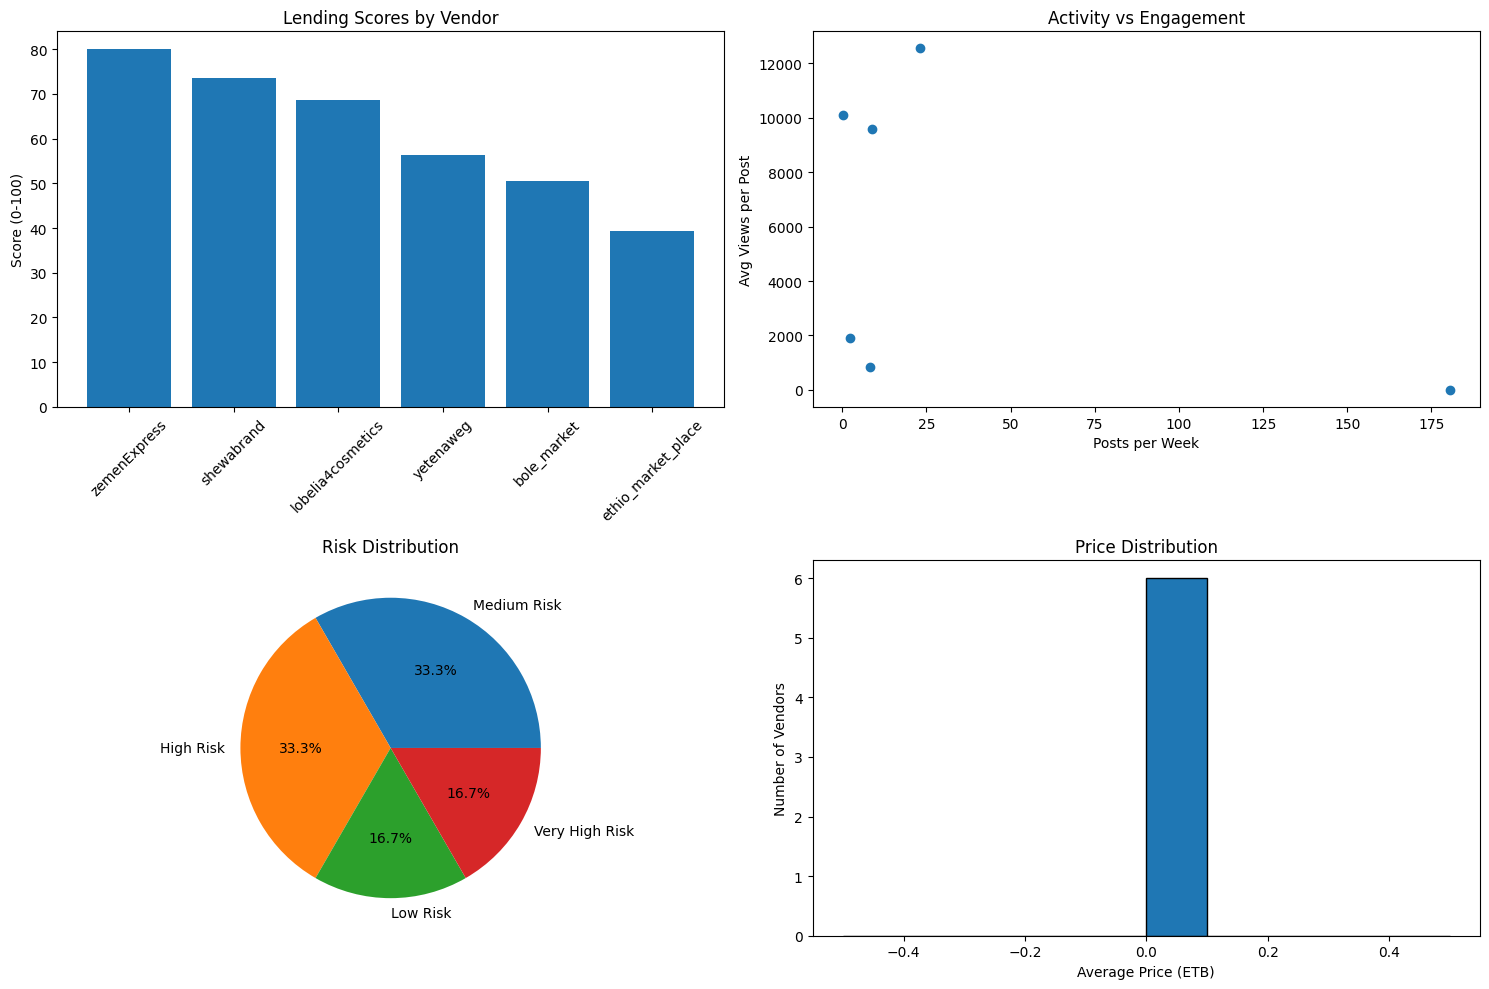

In [6]:
if not scorecard_df.empty:
    # Create visualizations
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # Lending scores
    ax1.bar(scorecard_df['Vendor_Channel'], scorecard_df['Lending_Score'])
    ax1.set_title('Lending Scores by Vendor')
    ax1.set_ylabel('Score (0-100)')
    ax1.tick_params(axis='x', rotation=45)
    
    # Views vs Posts relationship
    ax2.scatter(scorecard_df['Posts_Per_Week'], scorecard_df['Avg_Views_Per_Post'])
    ax2.set_xlabel('Posts per Week')
    ax2.set_ylabel('Avg Views per Post')
    ax2.set_title('Activity vs Engagement')
    
    # Risk distribution
    risk_counts = scorecard_df['Risk_Category'].value_counts()
    ax3.pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%')
    ax3.set_title('Risk Distribution')
    
    # Price distribution
    ax4.hist(scorecard_df['Avg_Price_ETB'], bins=10, edgecolor='black')
    ax4.set_xlabel('Average Price (ETB)')
    ax4.set_ylabel('Number of Vendors')
    ax4.set_title('Price Distribution')
    
    plt.tight_layout()
    plt.show()

## Business Insights

In [7]:
if not scorecard_df.empty:
    print("BUSINESS INSIGHTS:")
    
    # Overall statistics
    avg_score = scorecard_df['Lending_Score'].mean()
    high_performers = len(scorecard_df[scorecard_df['Lending_Score'] >= 70])
    low_risk = len(scorecard_df[scorecard_df['Risk_Category'] == 'Low Risk'])
    
    print(f"\nOverall Performance:")
    print(f"  Average Lending Score: {avg_score:.1f}/100")
    print(f"  High Performers (≥70): {high_performers}/{len(scorecard_df)}")
    print(f"  Low Risk Vendors: {low_risk}/{len(scorecard_df)}")
    
    # Market insights
    total_views = scorecard_df['Avg_Views_Per_Post'].sum()
    most_active = scorecard_df.loc[scorecard_df['Posts_Per_Week'].idxmax()]
    highest_engagement = scorecard_df.loc[scorecard_df['Avg_Views_Per_Post'].idxmax()]
    
    print(f"\nMarket Insights:")
    print(f"  Most Active: {most_active['Vendor_Channel']} ({most_active['Posts_Per_Week']:.1f} posts/week)")
    print(f"  Highest Engagement: {highest_engagement['Vendor_Channel']} ({highest_engagement['Avg_Views_Per_Post']:.0f} views/post)")
    print(f"  Price Range: {scorecard_df['Avg_Price_ETB'].min():.0f} - {scorecard_df['Avg_Price_ETB'].max():.0f} ETB")

BUSINESS INSIGHTS:

Overall Performance:
  Average Lending Score: 61.4/100
  High Performers (≥70): 2/6
  Low Risk Vendors: 1/6

Market Insights:
  Most Active: ethio_market_place (180.4 posts/week)
  Highest Engagement: zemenExpress (12546 views/post)
  Price Range: 0 - 0 ETB


## Generate Detailed Report

In [8]:
# Generate and save detailed analytics report
analytics.generate_detailed_report(df, "../data/processed/vendor_analytics_report.json")

print("Detailed vendor analytics report saved to:")
print("  - data/processed/vendor_analytics_report.json")
print("  - data/processed/vendor_analytics_report_scorecard.csv")

Detailed vendor analytics report saved to:
  - data/processed/vendor_analytics_report.json
  - data/processed/vendor_analytics_report_scorecard.csv


## Lending Recommendations

In [9]:
# Load and display recommendations
import json

with open("../data/processed/vendor_analytics_report.json", 'r', encoding='utf-8') as f:
    report = json.load(f)

print("MICRO-LENDING RECOMMENDATIONS:")
for i, rec in enumerate(report['recommendations'], 1):
    print(f"{i}. {rec}")

print(f"\nAnalysis completed on {report['summary']['analysis_date'][:10]}")
print(f"Top vendor for lending: {report['summary']['top_vendor']}")
print(f"Average lending score: {report['summary']['avg_lending_score']:.1f}/100")

print("\n🎉 Vendor analytics and scorecard generation completed!")

MICRO-LENDING RECOMMENDATIONS:
1. Consider priority lending to 2 high-scoring vendors.
2. Exercise caution with 3 high-risk vendors.
3. 4 vendors show high activity levels.
4. 5 vendors demonstrate strong market reach.

Analysis completed on 2025-08-23
Top vendor for lending: zemenExpress
Average lending score: 61.4/100

🎉 Vendor analytics and scorecard generation completed!
